<a href="https://colab.research.google.com/github/yurismael/Pokedata/blob/main/PROJETO_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Inserção do dataframe original e limpeza inicial
df = pd.read_csv("/content/pokemon_data.csv")

df = df.drop(['dexnum', 'ability1', 'ability2', 'hidden_ability'], axis = 1)
df = df.drop(['ev_yield', 'catch_rate', 'base_friendship', 'base_exp'], axis = 1)
df = df.drop(['growth_rate', 'egg_group1', 'egg_group2', 'percent_male'], axis = 1)
df = df.drop(['percent_female', 'egg_cycles', 'special_group', 'species'], axis = 1)

In [3]:
# Dicionário para cada tipo
df_tipo = {}
for tipo in df['type1'].unique():
    df_tipo[tipo] = df.loc[(df['type1'] == tipo) | (df['type2'] == tipo)]

# Dicionário para média de cada tipo
medias = {}
for tipo in df_tipo:
    medias[tipo] = df_tipo[tipo][['height', 'weight', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].mean()

# Dicionário de cores para cada tipo
cores_tipo = {
    'Normal': '#A8A878',  # Bege claro
    'Fire': '#F08030',    # Vermelho alaranjado
    'Water': '#6890F0',    # Azul claro
    'Grass': '#78C850',    # Verde grama
    'Electric': '#F8D030',   # Amarelo elétrico
    'Ice': '#98D8D8',     # Azul gelo
    'Fighting': '#C03028',   # Vermelho escuro
    'Poison': '#A040A0',    # Roxo
    'Ground': '#E0C068',    # Marrom claro
    'Flying': '#A890F0',    # Azul lavanda
    'Psychic': '#F85888',   # Rosa choque
    'Bug': '#A8B820',     # Verde oliva
    'Rock': '#B8A038',     # Marrom amarelado
    'Ghost': '#705898',    # Roxo escuro
    'Dragon': '#7038F8',    # Roxo azulado
    'Dark': '#705848',     # Marrom escuro
    'Steel': '#B8B8D0',    # Cinza azulado
    'Fairy': '#EE99AC',    # Rosa claro
}

In [4]:
def plotar_geral():
  # Referências
  categorias = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
  ref_atributos = [df['hp'].mean(), df['attack'].mean(), df['defense'].mean(), df['sp_atk'].mean(), df['sp_def'].mean(), df['speed'].mean()]
  cor_ref = '#C0C0C0'

  # Criando a figura e eixo do gráfico
  fig, ax1 = plt.subplots(figsize=(5,5), subplot_kw = {'projection': 'polar'})

  qtd = len(categorias)
  angulos = np.linspace(0, 2 * np.pi, qtd, endpoint = False).tolist()

  # Fechar o círculo
  ref_atributos += ref_atributos[:1]
  angulos += angulos[:1]

  # Colocando os dados médios
  ax1.plot(angulos, ref_atributos, color = cor_ref, linewidth=1)
  ax1.fill(angulos, ref_atributos, color = cor_ref, alpha=0.5)

  # Definir o nome das categorias
  ax1.set_thetagrids(np.degrees(angulos[:-1]), categorias)

  # Mexe com a escala do gráfico
  ax1.set_rlim(0,100)

  # Mexe com a borda externa do gráfico
  ax1.spines['polar'].set_visible(False)

  fig.show()


In [5]:
def plotar_stats(tipo, pokemon_nome = None, ax = None):
  """
    A função cria um gráfico de radar comparativo entre a média geral e a média de tipo/pokemon, referente a seus atributos.

    Argumentos:
      tipo: O tipo do pokemon a ser exibido (ex.: 'Bug', 'Fire', 'Ice', etc.)
      pokemon_nome (Opcional): Define o pokemon a ser comparado com o pokemon médio (Default: None
      ax (Opcional): Define o eixo do gráfico para exibição (Default: None)
  """
  # Cores
  cor_tipo = cores_tipo.get(tipo)
  cor_humano = '#FFD700'
  cor_ref = '#C0C0C0'

  # Construindo o gráfico geral ----------------------------------------------------------------------------
  # Referências
  categorias = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
  ref_atributos = [df['hp'].mean(), df['attack'].mean(), df['defense'].mean(), df['sp_atk'].mean(), df['sp_def'].mean(), df['speed'].mean()]

  # Criando a figura e eixo do gráfico
  if ax is None:
    fig, ax = plt.subplots(figsize=(5,5), subplot_kw = {'projection': 'polar'})

  qtd = len(categorias)
  angulos = np.linspace(0, 2 * np.pi, qtd, endpoint = False).tolist()

  # Fechar o círculo
  ref_atributos += ref_atributos[:1]
  angulos += angulos[:1]
  # Valores
  if pokemon_nome:
    pokemon = df_tipo[tipo].loc[df_tipo[tipo]['name'] == pokemon_nome]
    stats_aux = pokemon[['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].values.tolist()[0]
  else:
    stats_aux = medias[tipo][['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']].tolist()
  stats_aux += stats_aux[:1]

  # Plotando a parte do Type
  ax.plot(angulos, stats_aux, color = cor_tipo, linewidth=1)
  ax.fill(angulos, stats_aux, color = cor_tipo, alpha=0.5)

  # Auto-ajuste da escala do gráfico
  maximo = max(max(stats_aux), 100)
  faixas = np.linspace(0, maximo, 5 + 1)

  ax.set_ylim(0, maximo * 1.1)
  ax.set_rlabel_position(30)
  ax.set_rgrids(faixas, labels = None)

  # Labels
  if pokemon_nome:
    ax.set_title(f"Stats: Média X {pokemon_nome}")
  else:
    ax.set_title(f"Stats: Média X {tipo}")

  if ax is None:
    plt.show()

In [6]:
def plotar_altura(tipo, pokemon_nome = None, ax = None):
  """
    Exibe o gráfico referente a altura média do tipo/pokemon em comparação com um ser humano e um pokemon médio

    Argumentos:
      tipo: O tipo do pokemon a ser exibido
      pokemon_nome (Opcional): Define o pokemon a ser comparado com o pokemon médio (Default: None)
      ax = (Opcional): Define o eixo do gráfico para exibição (Default: None)
  """
  # Cores
  # Carregando o dicionário de cores do programa
  cor_tipo = cores_tipo.get(tipo)
  cor_humano = '#FFD700'
  cor_ref = '#C0C0C0'

  # Valores referencia
  ref_humano = [1.8, 80]
  ref_media = [df['height'].mean(), df['weight'].mean()]

  # Caso: Pokemon
  if pokemon_nome:
    pokemon = df_tipo[tipo][df_tipo[tipo]['name'] == pokemon_nome]

    if not pokemon.empty:
      pokemon_altura = pokemon['height'].values[0]
      pokemon_peso = pokemon['weight'].values[0]
    else:
      print(f"O Pokémon {pokemon_nome} não foi encontrado.")
      return;
  # x corresponde as categorias no eixo x
    x = ['Humano', 'Pokemon', pokemon_nome]
  else:
    x = ['Humano', 'Pokemon', tipo]

  # Construindo a figura
  if ax is None:
    fig, ax = plt.subplots(figsize = (5,5))

  horizontal = np.arange(len(x))
  largura = 0.4

  # Gráfico 1: ALTURA  ----------------------------------------------------------------------------
  # Construindo as barras
  altura_Humano = ax.bar(horizontal, [ref_humano[0], 0, 0], largura, color = cor_humano)
  altura_Media = ax.bar(horizontal, [0, ref_media[0], 0], largura, color = cor_ref)

  # Construindo a ultima barra referente ao pokemon/tipo
  if pokemon_nome:
    altura_Pokemon = ax.bar(horizontal, [0, 0, pokemon_altura], largura, color = cor_tipo)
  else:
    altura_Tipo = ax.bar(horizontal, [0, 0, medias[tipo]['height']], largura, color = cor_tipo)

  # Labels
  ax.set_xticks(horizontal)
  ax.set_xticklabels(x)
  ax.set_ylabel('Altura (m)')

  # Mudando o titulo do eixo
  if pokemon_nome:
    ax.set_title(f"Altura: Humano X Média X {pokemon_nome}")
  else:
    ax.set_title(f"Altura: Humano X Média X {tipo}")

  if ax is None:
    fig.show()

In [7]:
def plotar_peso(tipo, pokemon_nome = None, ax = None):
  """
    A função exibe um/dois gráfico(s) de barras refente ao tipo/pokemon desejado em comparativo com um pokemon médio e um humano médio, em relação a sua altura e peso.

    Argumentos:
      tipo: O tipo do pokemon a ser exibido
      pokemon (Opcional): Define o pokemon a ser comparado com o pokemon médio (Default: None)
      ax (Opcional): Define o eixo do gráfico para exibição (Default: None)
  """
  # Cores
  # Carregando o dicionário de cores do programa
  cor_tipo = cores_tipo.get(tipo)
  cor_humano = '#FFD700'
  cor_ref = '#C0C0C0'

  # Valores referencia
  ref_humano = [1.8, 80]
  ref_media = [df['height'].mean(), df['weight'].mean()]

  # Caso: Pokemon
  if pokemon_nome:
    pokemon = df_tipo[tipo][df_tipo[tipo]['name'] == pokemon_nome]

    if not pokemon.empty:
      pokemon_altura = pokemon['height'].values[0]
      pokemon_peso = pokemon['weight'].values[0]
    else:
      print(f"O Pokémon {pokemon_nome} não foi encontrado.")
      return;
  # x corresponde as categorias no eixo x
    x = ['Humano', 'Pokemon', pokemon_nome]
  else:
    x = ['Humano', 'Pokemon', tipo]

  # Construindo a figura
  if ax is None:
    fig, ax = plt.subplots(figsize = (5,5))

  horizontal = np.arange(len(x))
  largura = 0.4

  # Gráfico 2: PESO ----------------------------------------------------------------------------
  # Construindo as barras
  peso_Humano = ax.bar(horizontal, [ref_humano[1], 0, 0], largura, color = cor_humano)
  peso_Media = ax.bar(horizontal, [0, ref_media[1], 0], largura, color = cor_ref)

  # Construindo a ultima barra referente ao pokemon/tipo
  if pokemon_nome:
    peso_Pokemon = ax.bar(horizontal, [0, 0, pokemon_peso], largura, color = cor_tipo)
  else:
    peso_Tipo = ax.bar(horizontal, [0, 0, medias[tipo]['weight']], largura, color = cor_tipo)

  # Labels
  ax.set_xticks(horizontal)
  ax.set_xticklabels(x)
  ax.set_ylabel('Peso (kg)')

  # Mudando o titulo do eixo
  if pokemon_nome:
    ax.set_title(f"Peso: Humano X Média X {pokemon_nome}")
  else:
    ax.set_title(f"Peso: Humano X Média X {tipo}")

  if ax is None:
    fig.show()

In [8]:
def plotar_disper(tipo, pokemon_nome = None, ax = None):
  """
    A função cria um gráfico de dispersão comparativo entre a ofensividade e defensividade geral no tipo

    Argumentos:
      tipo: O tipo do pokemon a ser exibido (ex.: 'Bug', 'Fire', 'Ice', etc.)
      pokemon_nome (Opcional): Define o pokemon a ser comparado com o pokemon médio (Default: None
      ax (Opcional): Define o eixo do gráfico para exibição (Default: None)
  """
  # Cores
  cor_tipo = cores_tipo.get(tipo)
  cor_humano = '#FFD700'
  cor_ref = '#C0C0C0'

  # Valores de referência
  ofensividade = ['attack', 'sp_atk', 'speed']
  defensividade = ['defense', 'sp_def', 'hp']

  x_atk = df_tipo[tipo][ofensividade].sum(axis = 1)
  y_def = df_tipo[tipo][defensividade].sum(axis = 1)

  # Encontra o indice do pokemon desejado para destaque
  if pokemon_nome:
    pokemon = df_tipo[tipo][df_tipo[tipo]['name'] == pokemon_nome]
    if not pokemon.empty:
      index = pokemon.index[0]
      x_pkm = x_atk[index]
      y_pkm = y_def[index]
    else:
      print(f"O Pokémon {pokemon_nome} não foi encontrado.")
      return;

  # Construindo a figura
  if ax is None:
    fig, ax = plt.subplots(figsize = (5,5))

  # Gráfico: DISPERSÃO ----------------------------------------------------------------------------
  # Construindo o gráfico
  ax.scatter(x_atk, y_def, color = cores_tipo[tipo], s = 10, label = tipo)
  ax.set_xlim(left = 0)
  ax.set_ylim(bottom = 0)

  # Highlight do pokemon escolhido
  if pokemon_nome:
    ax.scatter(x_pkm, y_pkm, color = 'red', s = 10, label = pokemon_nome)

  # Traçando a linha referente a média geral
  x_medio = df[ofensividade].sum(axis = 1).mean()
  y_medio = df[defensividade].sum(axis = 1).mean()
  razao = y_medio / x_medio
  y_aux = razao * x_atk.max(axis = 0)

  ax.plot([0, x_medio, x_atk.max(axis = 0)], [0, y_medio, y_aux], color = cor_ref, linestyle = '-')

  # Traçando a linha referente a média do tipo
  x_tipo = df_tipo[tipo][ofensividade].sum(axis = 1).mean()
  y_tipo = df_tipo[tipo][defensividade].sum(axis = 1).mean()
  razao = y_tipo / x_tipo
  y_aux = razao * x_atk.max(axis = 0)

  ax.plot([0, x_tipo, x_atk.max(axis = 0)], [0, y_tipo, y_aux], color = cores_tipo[tipo], linestyle = '-')

  # Labels
  ax.set_title(f'{tipo}: Ofensividade X Defensividade')
  ax.set_xlabel('Ofensividade')
  ax.set_ylabel('Defensividade')
  ax.legend()

  if ax is None:
    plt.show()

In [9]:
def plotar_todos(tipo, pokemon_nome = None, stats = True, disper = True, altura = True, peso = True):
  """
    A função exibe todos os gráficos numa figura de 2x2

    Argumentos:
      tipo: O tipo do pokemon a ser exibido
      pokemon_nome (Opcional): Define o pokemon a ser comparado com o pokemon médio (Default: None)
      stats (Opcional): Controla a exibição do gráfico de stats (Default: True)
      disper (Opcional): Controla a exibição do gráfico de dispersão (Default: True)
      altura (Opcional): Controla a exibição do gráfico de altura (Default: True)
      peso (Opcional): Controla a exibição do gráfico de peso (Default: True)
  """
  # Criando o frame de exibição
  fig, axs = plt.subplots(2, 2, figsize = (10,10))
  # Tornando o eixo do gráfico polar compatível

  eixo0 = axs[0,0] # Polar
  eixo1 = axs[0,1] # Dispersão
  eixo2 = axs[1,0] # Altura
  eixo3 = axs[1,1] # Peso

  # Limpando o espaço do Eixo 0
  for spine in eixo0.spines:
    eixo0.spines[spine].set_visible(False)
  eixo0.set_xticks([])
  eixo0.set_yticks([])

  if stats:
    eixo0 = fig.add_subplot(2, 2, 1, projection='polar')
    plotar_stats(tipo, pokemon_nome, ax = eixo0)

  # Exibição e limpeza do Eixo 1
  if disper:
    plotar_disper(tipo, pokemon_nome, ax = eixo1)
  else:
    for spine in eixo1.spines:
      eixo1.spines[spine].set_visible(False)
    eixo1.set_xticks([])
    eixo1.set_yticks([])

  # Exibição e limpeza do Eixo 2
  if altura:
    plotar_altura(tipo, pokemon_nome, ax = eixo2)
  else:
    for spine in eixo2.spines:
      eixo2.spines[spine].set_visible(False)
    eixo2.set_xticks([])
    eixo2.set_yticks([])

  # Exibição e limpeza do Eixo 3
  if peso:
    plotar_peso(tipo, pokemon_nome, ax = eixo3)
  else:
    for spine in eixo3.spines:
      eixo3.spines[spine].set_visible(False)
    eixo3.set_xticks([])
    eixo3.set_yticks([])

  fig.tight_layout()
  fig.show()

In [10]:
def pokemon_medio(tipo = None):
  """
    Essa é uma função que vai encontrar o pokemon médio realizando uma série de somas das diferenças quadráticas de seus abributos com as médias do tipo

    Argumentos:
      tipo (Opcional): O tipo (Ex.: 'Fairy', 'Water', 'Flying').

    Retorna:
      O nome do pokemon médio.
  """
  colunas = ['height', 'weight', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']

  if tipo is None:
    medias_geral = df[colunas].mean()
    pkm = df.apply(lambda row: np.sum((row[colunas] - medias_geral)**2), axis = 1)
  else:
    pkm = df_tipo[tipo].apply(lambda row: np.sum((row[colunas] - medias[tipo])**2), axis = 1)

  pkm = pkm.idxmin()

  if tipo is None:
    return df.loc[pkm, 'name']
  else:
    return df_tipo[tipo].loc[pkm, 'name']

In [11]:
pokemon_medio()

'Zweilous'

In [12]:
def pokemons_extremos(tipo):
  """
    Essa é uma função que vai encontrar o pokemon médio realizando uma série de somas das diferenças de seus abributos com as médias do tipo

    Argumentos:
      tipo: O tipo (Ex.: 'Fairy', 'Water', 'Flying').

    Retorna:
      O nome do pokemon mais abaixo da média.
      O nome do pokemon mais acima da média.
  """
  colunas = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']

  pkm = df_tipo[tipo].apply(lambda row: np.sum(row[colunas] - medias[tipo]), axis = 1)
  fraco = pkm.idxmin()
  forte = pkm.idxmax()

  return df_tipo[tipo].loc[fraco, 'name'], df_tipo[tipo].loc[forte, 'name']

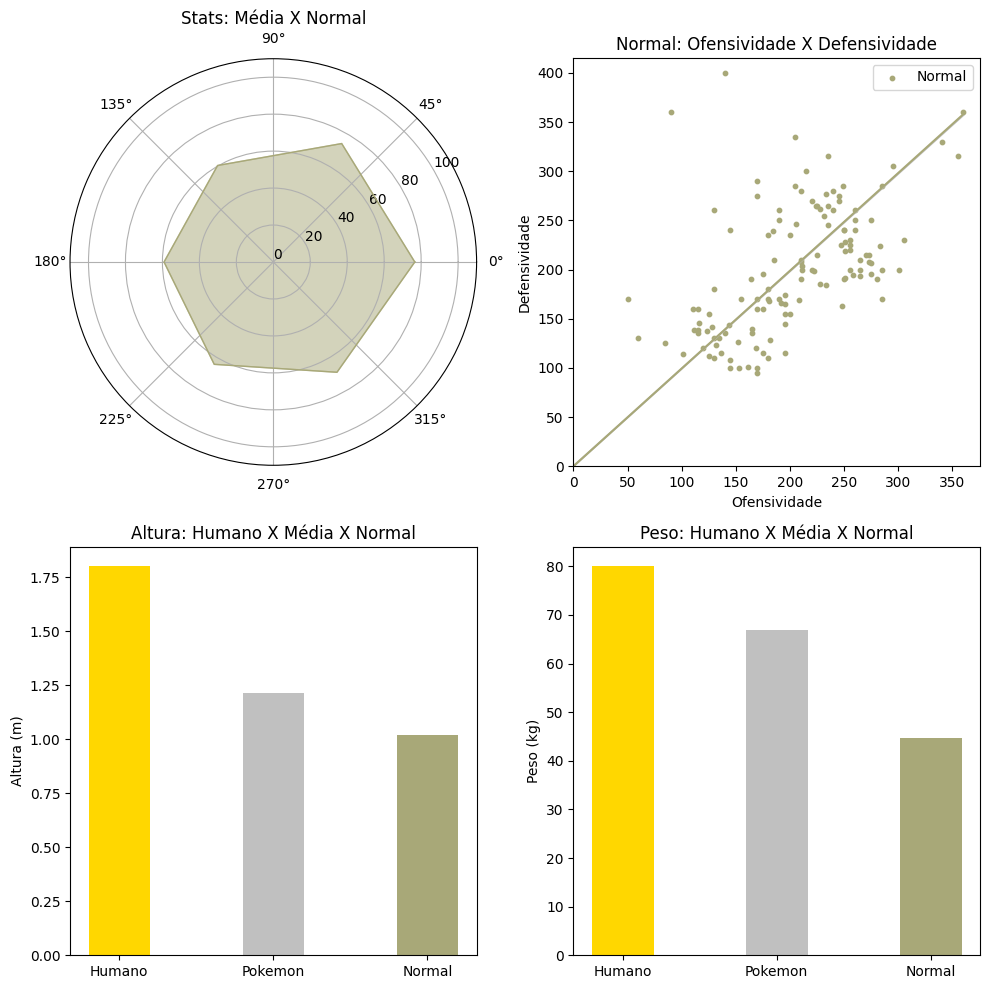

In [13]:
plotar_todos('Normal')